In [1]:
import numpy as np
from quafu.quantum_circuit import QuantumCircuit

In [2]:
qubits18 = []
for idx in range(3,21):
    qubits18.append('q'+str(idx))
    exec("q{}='q'+str(idx)".format(idx))

### 单比特门测试

In [ ]:
q = QuantumCircuit(18)
q.set_backend("ScQ-P20")

In [ ]:
qubits = [q3, q4, q5, q6]
measures = [qubits18.index(qubit) for qubit in qubits]

In [ ]:
for q_idx in measures:
    q.x(q_idx)
q.measure(measures, shots=1000)

In [ ]:
res = q.send(compile=False)
res.plot_amplitudes()

### CZ门测试

In [3]:
q = QuantumCircuit(18)
q.set_backend("ScQ-P20")

In [4]:
qubits = [q3, q4]
measures = [qubits18.index(qubit) for qubit in qubits]

In [5]:
q.h(measures[0])
q.cnot(measures[0], measures[1])
q.measure(measures, shots=1000)

In [6]:
q.draw_circuit()

q[0]  -H---*-- M->c[0]
           |  
q[1]  -----+-- M->c[1]


In [10]:
res = q.send(compile=False)
res.plot_amplitudes()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

### GHZ测试

In [4]:
q = QuantumCircuit(18)
q.set_backend("ScQ-P20")

In [7]:
q = ghz_task_generate(q, 4, 'q10', 'p', 1000)

H_qubit is q12
parallel GHZ4 circuit(start: q10) is generated


In [8]:
q.draw_circuit()

q[7]  ----------+-- M->c[0]
                |  
q[8]  -----+----*-- M->c[1]
           |       
q[9]  -H---*----*-- M->c[2]
                |  
q[10] ----------+-- M->c[3]


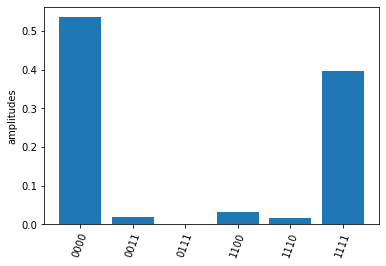

In [13]:
res = q.send(compile=False)
res.plot_amplitudes()

In [6]:
def ghz_task_generate(Qcir, ghz_num=10, qubit_start=0, cir_type='serial', shots=None):
    '''
    Generate ghz task in Qcir(type: quafu.quantum_circuit, necessary)
    qubit_start: number/name of the start qubit, like 'q3' or 0
    cir_type: 's'(or 'serial') or 'p'(or 'parallel'), support in upper alphabet
    '''
    
    backend = Qcir.backend
    backend_qnum = int(backend[backend.index('P') + 1:])
    backend_qnum = backend_qnum - 2 if backend_qnum == 20 else backend_qnum
    
    if shots is None:
        shots = 2 ** ghz_num * 10
    
    if type(qubit_start) is str:
        qubit_start = eval('qubits'+str(backend_qnum)).index(qubit_start)
    
    if qubit_start + ghz_num > backend_qnum:
        print('Error: out of '+ Qcir.backend + 'range')
        return
    
    cir_type = cir_type.lower()
    
    if cir_type in ['serial', 's']:
        cir_type = 'serial'
        H_qubit = qubit_start
        Qcir.h(H_qubit)
        for cnot_cq in range(H_qubit, H_qubit + ghz_num - 1):
            Qcir.cnot(cnot_cq, cnot_cq + 1)
    
    elif cir_type in ['parallel', 'p']:
        cir_type = 'parallel'
        H_qubit = qubit_start + (ghz_num + 1)//2
        print('H_qubit is {}'.format(eval('qubits'+str(backend_qnum))[H_qubit]))
        Qcir.h(H_qubit)
        # upper CZ gates
        cnot_cq = H_qubit
        while cnot_cq > qubit_start:
            Qcir.cnot(cnot_cq, cnot_cq - 1)
            cnot_cq = cnot_cq - 1
        # lower CZ gates
        cnot_cq = H_qubit
        while cnot_cq < qubit_start + ghz_num - 1:
            Qcir.cnot(cnot_cq, cnot_cq + 1)
            cnot_cq = cnot_cq + 1
    
    else:
        print('Error: your circuit type'+ cir_type + 'mistakes')
    
    measures = list(range(qubit_start, qubit_start + ghz_num))
    Qcir.measure(measures, shots=shots)
    
    print('{} GHZ{} circuit(start: {}) is generated'.format(cir_type, ghz_num, eval('qubits'+str(backend_qnum))[qubit_start]))
    return Qcir

### 其他

In [ ]:
q.gates

In [ ]:
print(q.to_openqasm())